# Relatório de Análise VIII
## Identificando e Removendo Outliers

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [39]:
dados= pd.read_csv('dados/aluguel_residencial.csv', sep=';')
valor = dados['Valor']

In [40]:
#Boxplot separa medianas ao meio e outliers ficam separados

In [41]:
q1 = dados['Valor'].quantile(.25)
q3= dados.Valor.quantile(0.75)
iiq = q3-q1
limite_inferior = q1- .15*iiq
limite_superior = q3+ .15*iiq

In [42]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

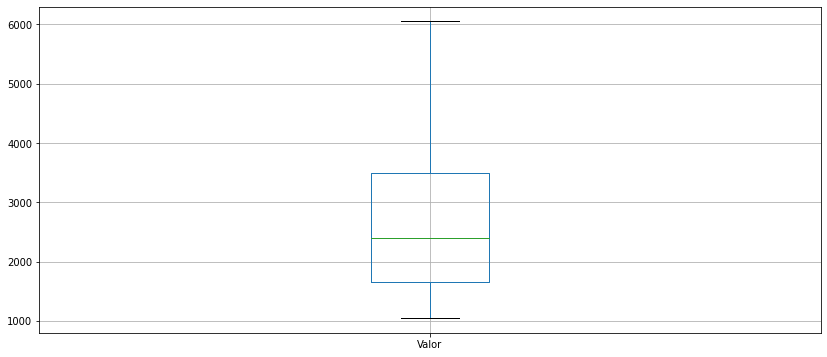

In [43]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

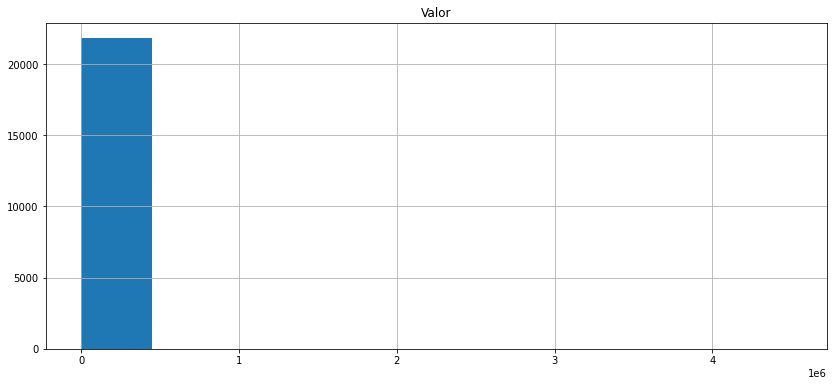

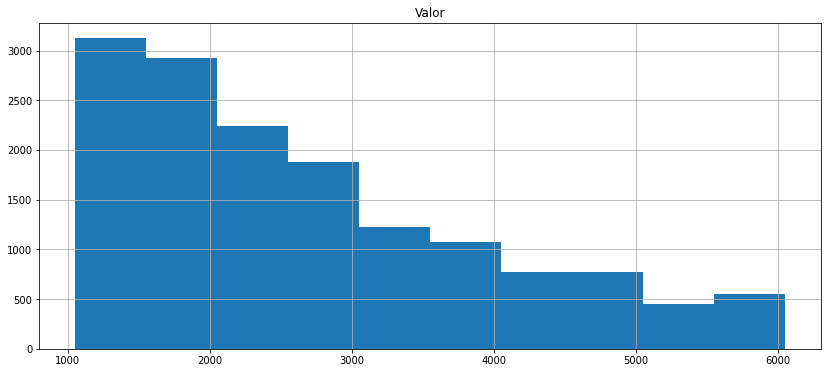

In [44]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

# Exercício

In [27]:
dados= pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [28]:
valores = dados['Valor m2']
Q1 = valores.quantile(0.25)
Q3 = valores.quantile(0.75)
IIQ = Q3-Q1 
limite_inferior= Q1-1.5*IIQ
limite_superior= Q3+1.5*IIQ
print('Q1 = {}. Q3= {}. IIQ= {}. Q1-1.5*IIQ= {}. Q3+1.5*IIQ= {}'.format(Q1,Q3,IIQ, limite_inferior, limite_superior))

Q1 = 21.25. Q3= 42.31. IIQ= 21.060000000000002. Q1-1.5*IIQ= -10.340000000000003. Q3+1.5*IIQ= 73.9


# Indentificando e Removendo Outliers(Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

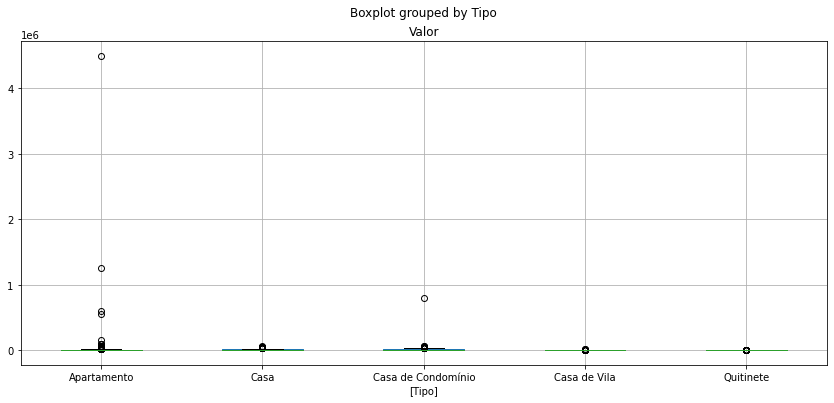

In [46]:
dados.boxplot(['Valor'], by= ['Tipo'])

In [49]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [52]:
type(grupo_tipo)
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [53]:
valores = grupo_tipo
Q1 = valores.quantile(0.25)
Q3 = valores.quantile(0.75)
IIQ = Q3-Q1 
limite_inferior= Q1-1.5*IIQ
limite_superior= Q3+1.5*IIQ

In [54]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [55]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [56]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [57]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [58]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [63]:
dados_new= pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    tipo_correto = dados['Tipo'] == tipo
    dentro_limite= (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao= tipo_correto & dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

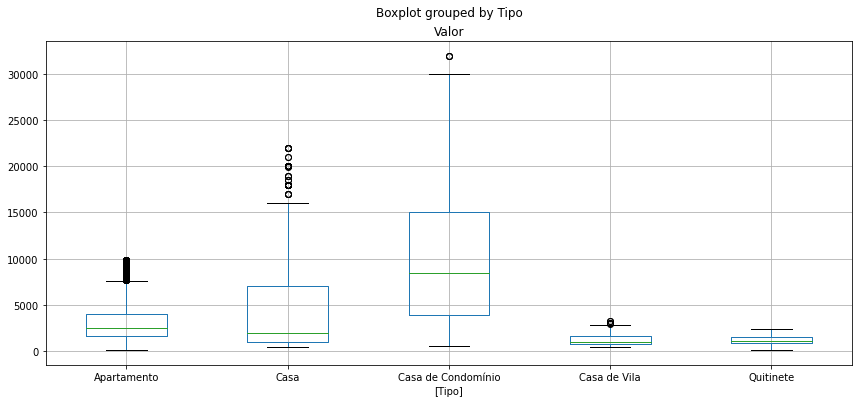

In [64]:
dados_new.boxplot(['Valor'], by= ['Tipo'])

In [65]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)